# Exercises - chapter 6

These exercises concern the data set that is stored in the file `unnamed.data`. This file is available in Moodle.

Use the packages `PCAmixdata`, `e1071`, and `caret` to complete the exercises. 

In [3]:
install.packages("factoextra")
library(cluster)
library(factoextra)
library(PCAmixdata)
library(pvclust)
library(rpart)
library(rpart.plot)
library(caret)
library(ggplot2)

exset = read.table('unnamed.data')


Installing package into 'C:/Users/JK/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\JK\AppData\Local\Temp\RtmpwTcpPl\downloaded_packages


Warning message:
"package 'factoextra' was built under R version 3.6.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
"package 'PCAmixdata' was built under R version 3.6.2"Warning message:
"package 'pvclust' was built under R version 3.6.2"Warning message:
"package 'rpart.plot' was built under R version 3.6.2"Warning message:
"package 'caret' was built under R version 3.6.2"Loading required package: lattice


#### 6.1

Use box plots and scatter plots to explore the data.

Do you see differences between the variables or patterns in the data?

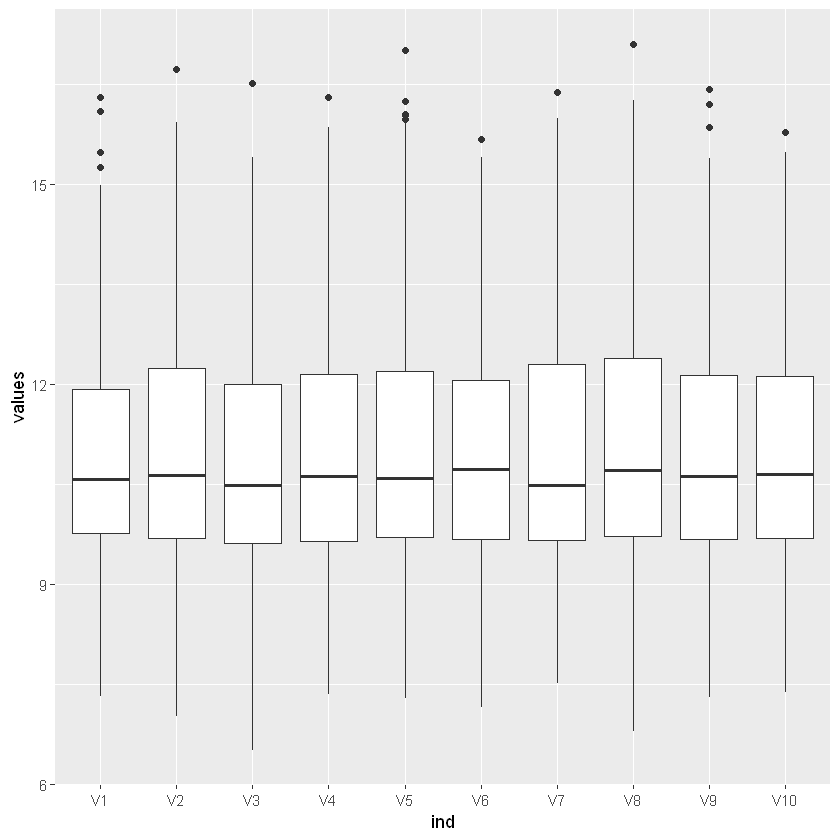

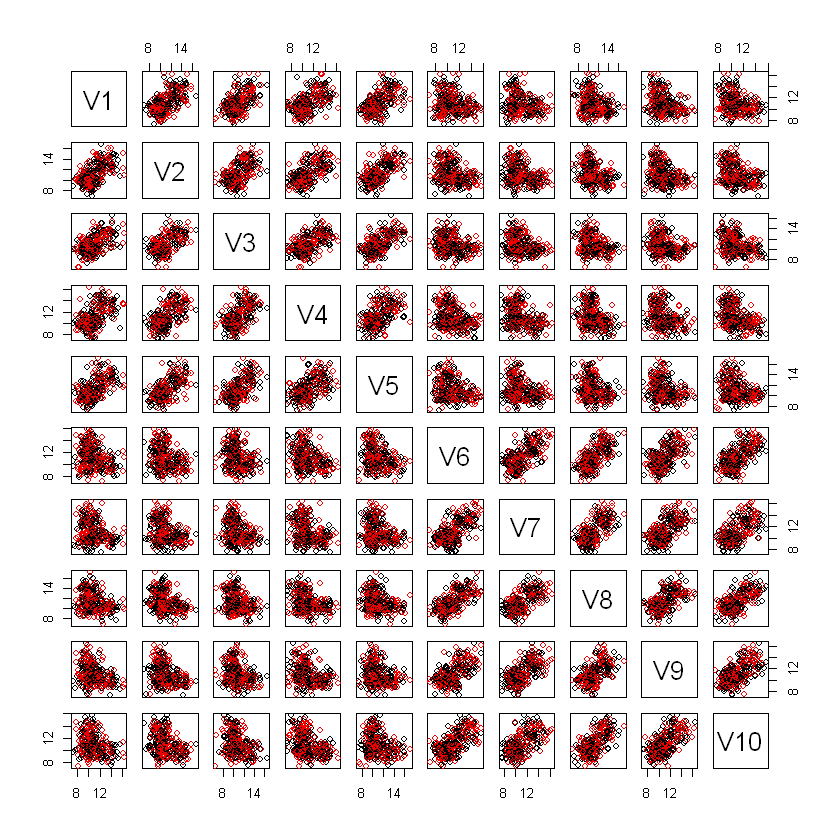

In [10]:
#create box plots from all variables of the data set

ggplot(stack(exset), aes(x = ind, y = values)) +
  geom_boxplot()

#boxplot(exset)

#create scatter plots from all variables of the data set
colors = c("red2", "black")
pairs(exset, col=colors)

# There is no mention of what the values are or where they come from 
# Judging from graphs below, there doesn't seem to be much differences
# Data seems all mashed up and roughly speaking quite homogenous
# some linear trends , plots are going left to right

#### 6.2

Use the principal component analysis to examine the data for non-evident patterns. Inspect the scatter plot of the first two *** principal components.

***  The first principal component is the direction in space along which projectionshave the largest variance. The second principal component is the direction whichmaximizes variance among all directions orthogonal to the first. Thekthcomponentis the variance-maximizing direction orthogonal to the previousk−1 components.There arepprincipal components in all.

How many clusters can you visually see in the plot?

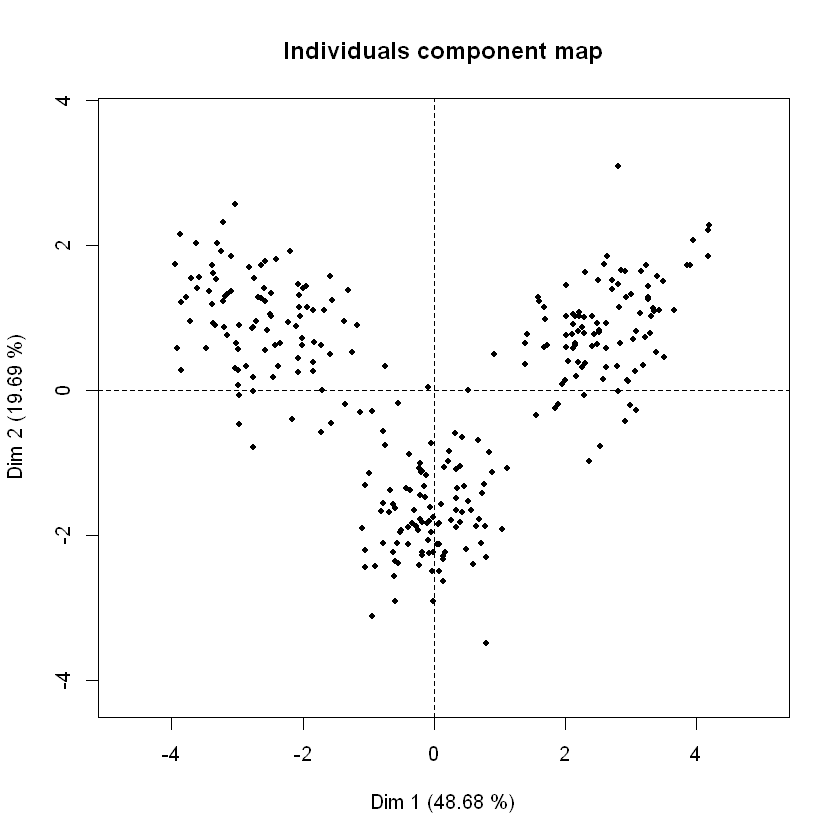

In [17]:
# calculate principal components
pca = PCAmix(exset, rename.level=TRUE, graph=FALSE)

#if summary is used, -> dim1 and dim2 form variables contain most of the data when judging the weights

# transform the observations into the principal component space and use
# the first two dimensions to plot the observations
plot(pca, choice='ind', label=FALSE) #<- to get rid of the numbers and get only dots
# this reduces the data to cover only the 2 dimensions


#Three beautiful clusters

#### 6.3

Cluster the observations into three flat clusters using the `K-means` method. The function `kmeans` is available in R for this purpose.

The `cluster` attribute of the results contains the vector of cluster ids. They indicate which clusters the observations were assigned to. Plot the first two principal components again, but now use the assigned clusters to colour the points.

Do the discovered clusters agree with your visual judgement?

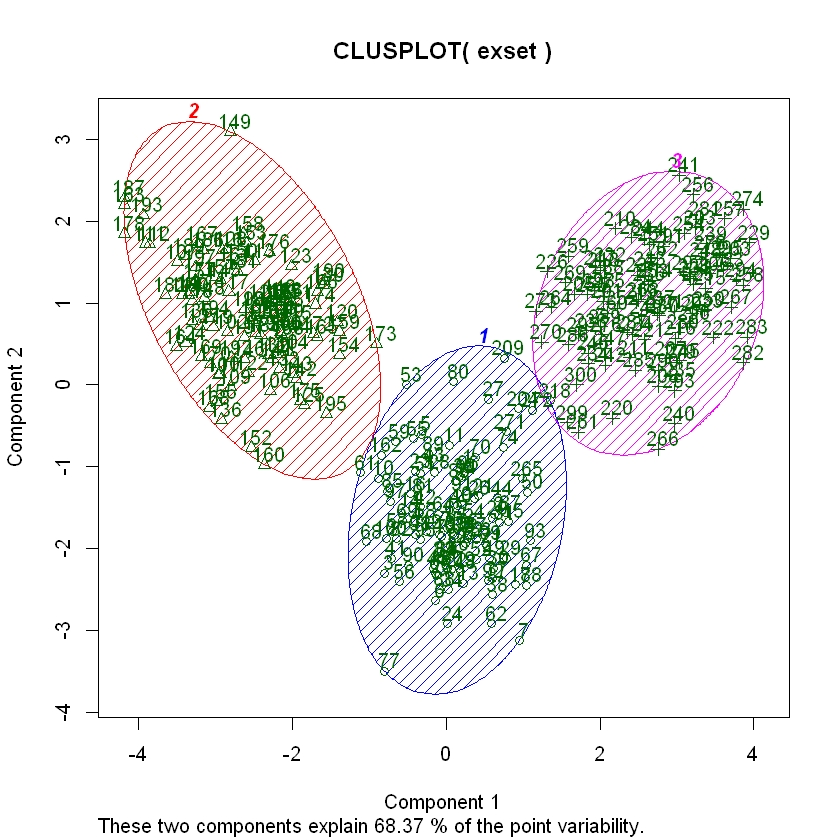

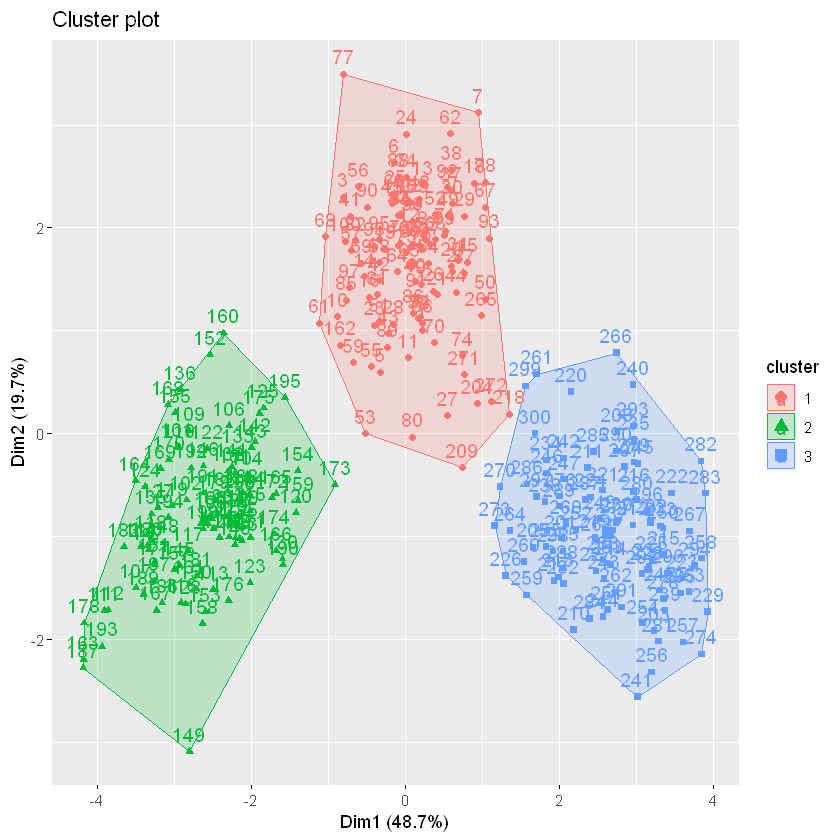

In [26]:
#wasn't that certain what I was suppose to do, but here's the kmeans
klustex = kmeans(exset, 3, iter.max = 10, nstart = 1)

#assigned = factor(clusters$cluster) <- make them factorial
#soloring based on assigned 
#color.ind=assigned

#These are what I find for visualization, though don't know are these what I was suppose to do
# 
# Cluster Plot against 1st 2 principal components <- statmethods.com
clusplot(exset, klustex$cluster, color=TRUE, shade=TRUE, labels=2, lines=0)

# ggplot like visualization <- datanovia.com
# takes k-means results and the original data as arguments. 
#In the resulting plot, observations are represented by points
# using principal components if the number of variables is greater than 2
fviz_cluster(klustex, exset)

# New clusters are in agreement with previous. fviz seems to be upside down version from those to upper

#### 6.4

The data is a mixture of three populations. The first hundred observations belong to the same population, and similarly for the second hundred and the last hundred observations.

Plot the first two principal components again, but now use the real populations to colour the points. You can also use the `confusionMatrix` function to see how well the assigned clusters match the populations.

Was the `K-means` method able to discover meaningful clusters?

In [7]:
y = factor(rep(factor(1:3), each=100))
confusionMatrix 




# Again, slightly lost and seems that I didn't get this right at all
#library(cluster)

#clusplot(exset, clus$cluster, cex=1, col.p=c(rep(1, 100), rep(2, 100), rep(3,100)))
# But did something; here's what I tried to do
# Divide into real populations
#first = subset(exset[1:100,])
#second = subset(exset[101:200,])
#third = subset(exset[201:300,])

# Do Pca's to each of those individually#
#pca1 = PCAmix(first, rename.level=TRUE, graph=FALSE)
#pca2 = PCAmix(second, rename.level=TRUE, graph=FALSE)
#pca3 = PCAmix(third, rename.level=TRUE, graph=FALSE)

# Do the graphs
#plot(pca1, choice='ind', label=FALSE)
#plot(pca2, choice='ind', label=FALSE)
#plot(pca3, choice='ind', label=FALSE)

function (data, ...) 
{
    UseMethod("confusionMatrix")
}
<bytecode: 0x0000000059b9edc8>
<environment: namespace:caret>

#### 6.5

Train a support vector machine to classify the observations into the populations they belong to. The `svm` function is available in R for this purpose.

Use the radial basis function kernel (`kernel = 'radial'`). Set the value of the gamma hyperparameter to 10 (`gamma = 10`). Train a model with the whole data set and estimate its generalisation performance with the same data.

According to your results, how good is your model to classify future instances? Can you rely on your estimate of the generalisation performance?

In [38]:
#x roiginal data
# y from previous, the thing you want to predict
# model = svm 
# labels unknown, features only can be measured

#i'm missing the training data
library("e1071")
svm(exset, kernel =
      "radial", gamma = 10)


Call:
svm.default(x = exset, kernel = "radial", gamma = 10)


Parameters:
   SVM-Type:  one-classification 
 SVM-Kernel:  radial 
      gamma:  10 
         nu:  0.5 

Number of Support Vectors:  300


#### 6.6

Repeat the previous exercise, but now use a random 80 % of the data for the training and the remaining 20 % for the evaluation.

According to your results, how good is your model to classify future instances? Can you rely on your estimate of the generalisation performance?

In [39]:
# set the state of the random number generator
# so that the analysis is repeatable
set.seed(843)

# split the data set into training and test sets
# (80% - 20% split)
idx = sample(nrow(exset), nrow(exset)/5) # to divide
training_features = x[-idx,] #80%
training_labels = y[idx,] #20%
test_features = x[idx]
test_labels=y[-idx]
classifier = svm(training, kernel = "radial", gamma = 10)

#### 6.7

Split the data randomly into three sets that have the relative sizes 60 %, 20 %, and 20 %.

Optimise the gamma hyperparameter with the first two sets. Consider the values $10^{-5}$, $10^{-4}$, $10^{-3}$, $10^{-2}$, $10^{-1}$, $10^{0}$, $10^{1}$, $10^{2}$, $10^{3}$, $10^{4}$, $10^{5}$.

Which gamma value yields the best model?

#### 6.8

Use the first two sets and the optimised `gamma` value from the previous exercise to train your final model. Estimate the generalisation performance of the model with the third set.

Was the hyperparameter optimisation successful in improving your model?